<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/ML_Week4_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Library dan Load Dataset

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="whitegrid")
sns.set_palette("husl")

compas_df = pd.read_csv('compas-scores-two-years.csv')

## 2. Exploratory Data Analysis (EDA)

### 2.1. Overview Dataset

In [ ]:
# Menampilkan informasi dasar dataset
print("Shape Dataset:", compas_df.shape)
print("\nInfo Dataset:")
compas_df.info()

# Menampilkan beberapa baris pertama
compas_df.head()

Shape Dataset: (7214, 53)

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-nul

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


### 2.2. Statistik Deskriptif

In [ ]:
# Menampilkan statistik deskriptif
compas_df.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
count,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,6907.000000,7192.000000,7214.000000,2316.000000,0.0,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,5501.255753,34.817993,0.067230,4.509565,0.090934,0.109371,3.472415,3.304763,57.731368,0.481148,20.269430,NaN,0.113529,4.509565,3.691849,3.472415,11.465068,553.436651,0.382867,0.450652
std,3175.706870,11.888922,0.473972,2.856396,0.485239,0.501586,4.882538,75.809505,329.740215,0.499679,74.871668,NaN,0.317261,2.856396,2.510148,4.882538,46.954563,399.020583,0.486120,0.497593
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-414.000000,0.000000,0.000000,-1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2735.250000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,148.250000,0.000000,0.000000
50%,5509.500000,31.000000,0.000000,4.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,4.000000,3.000000,2.000000,0.000000,530.500000,0.000000,0.000000
75%,8246.500000,42.000000,0.000000,7.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,7.000000,5.000000,5.000000,1.000000,914.000000,1.000000,1.000000
max,11001.000000,96.000000,20.000000,10.000000,13.000000,17.000000,38.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,38.000000,937.000000,1186.000000,1.000000,1.000000


### 2.3. Pengecekan Missing Values

In [ ]:
# Menghitung missing values
missing_values = compas_df.isnull().sum()
missing_percentage = (missing_values / len(compas_df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
missing_data[missing_data['Missing Values'] > 0].sort_values('Percentage', ascending=False)


,Missing Values,Percentage
violent_recid,7214,100.000000
vr_offense_date,6395,88.647075
vr_charge_degree,6395,88.647075
vr_case_number,6395,88.647075
vr_charge_desc,6395,88.647075
c_arrest_date,6077,84.238980
r_jail_out,4898,67.895758
r_jail_in,4898,67.895758
r_days_from_arrest,4898,67.895758
r_charge_desc,3801,52.689215


### 2.4. Analisis Target Variable

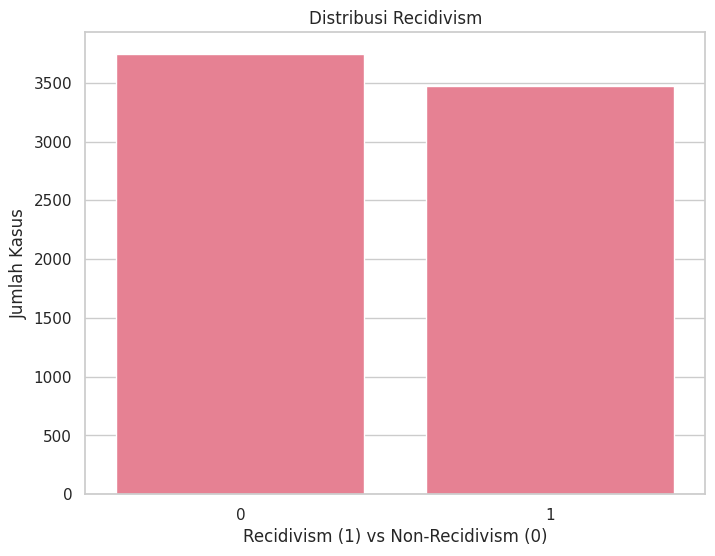


Persentase Distribusi Recidivism:
is_recid
0    51.89
1    48.11
Name: count, dtype: float64


In [ ]:
# Menghitung distribusi kelas target
target_distribution = compas_df['is_recid'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribusi Recidivism')
plt.xlabel('Recidivism (1) vs Non-Recidivism (0)')
plt.ylabel('Jumlah Kasus')
plt.show()

# Menampilkan persentase distribusi
print("\nPersentase Distribusi Recidivism:")
print((target_distribution / len(compas_df) * 100).round(2))


## 3. Feature Engineering

### 3.1. Penanganan Missing Values

In [ ]:
# Fungsi untuk menangani missing values
def handle_missing_values(df):
    # Numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

    # Categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

    return df

# Apply fungsi
compas_df = handle_missing_values(compas_df)


### 3.2. Encoding Categorical Variables

In [ ]:
def encode_categorical(df):
    le = LabelEncoder()
    categorical_cols = df.select_dtypes(include=['object']).columns

    for col in categorical_cols:
        df[col] = le.fit_transform(df[col].astype(str))

    return df

# Apply encoding
compas_df = encode_categorical(compas_df)


## 4. Data Visualization

### 4.1. Distribusi Fitur Numerik

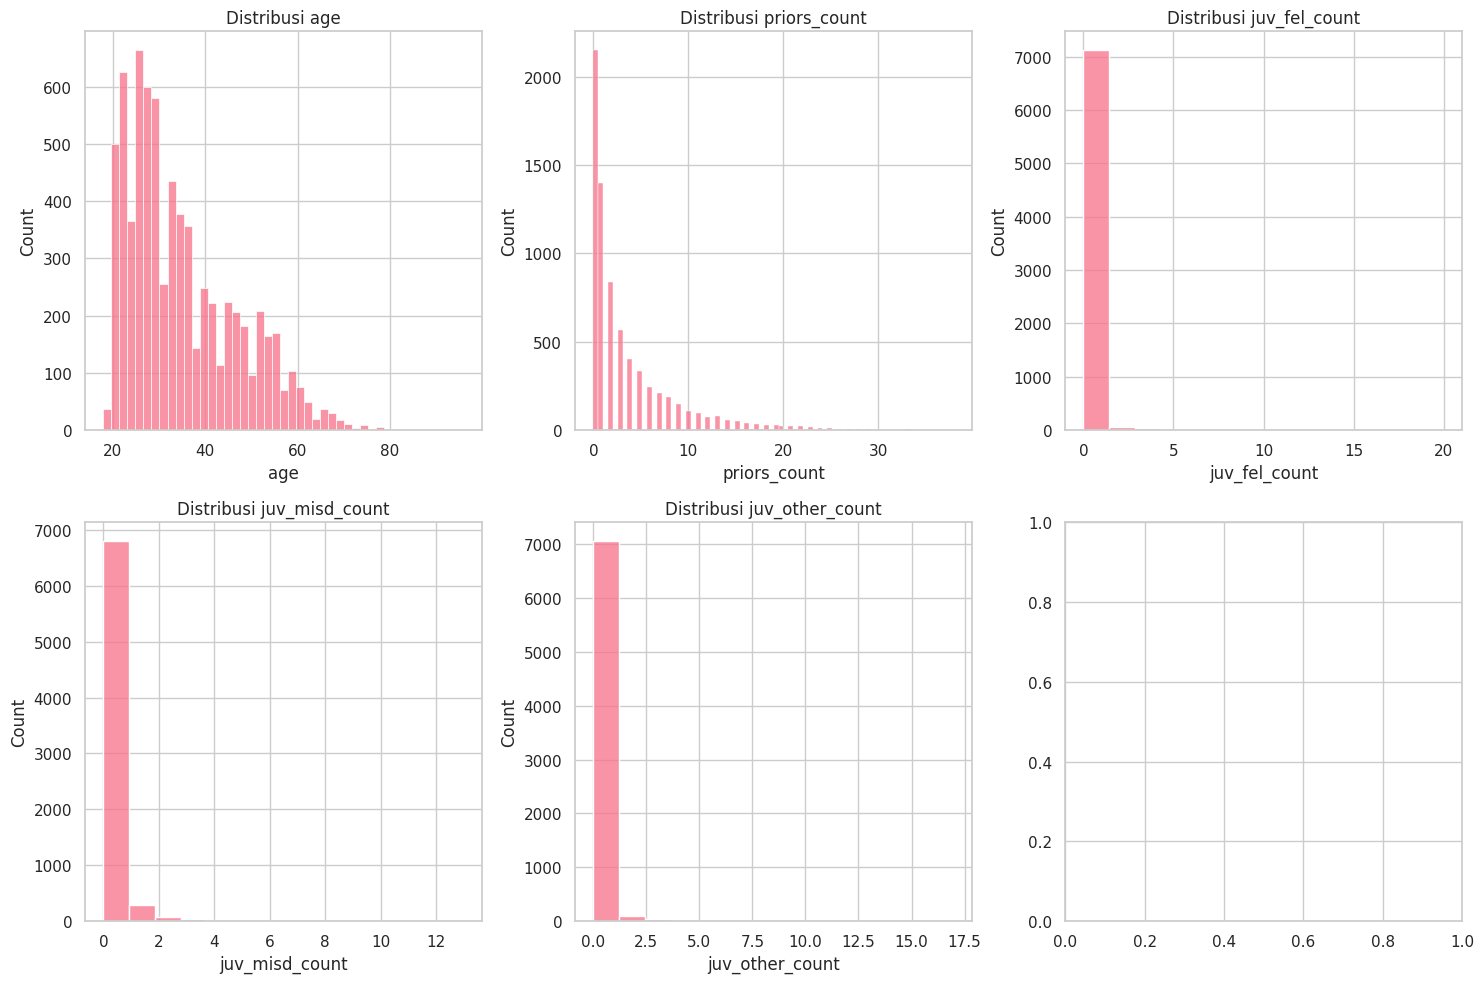

In [ ]:
# Memilih features numerik penting
important_numeric_features = ['age', 'priors_count', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']

# Membuat histogram untuk setiap feature
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(important_numeric_features):
    sns.histplot(data=compas_df, x=feature, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature}')

plt.tight_layout()
plt.show()


### 4.2. Analisis Demografis

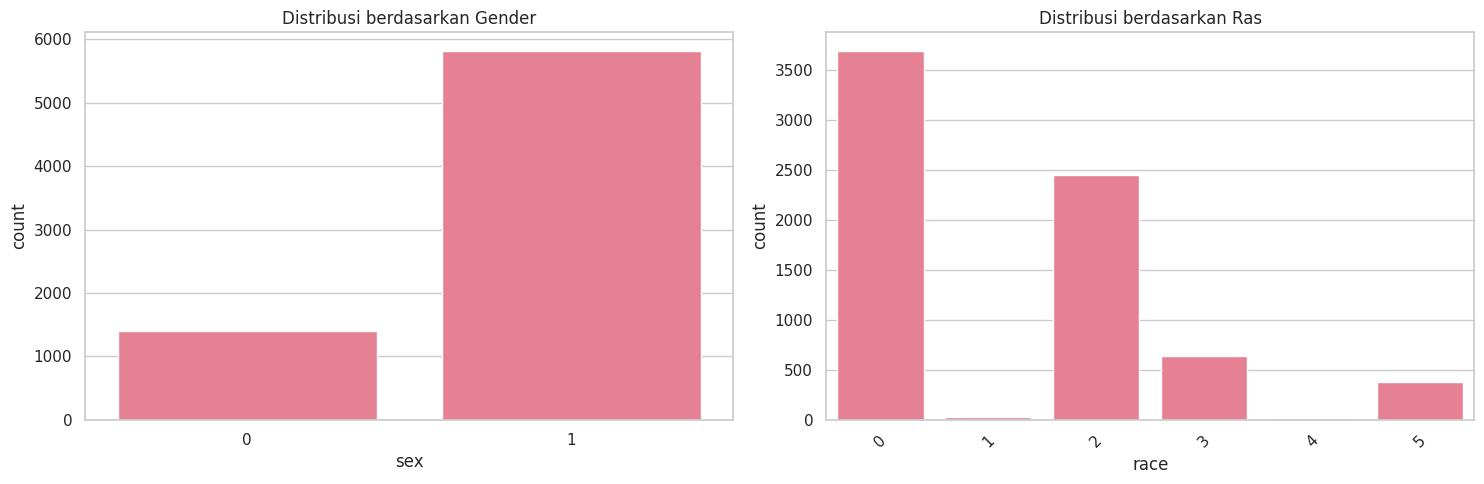

In [ ]:
# Visualisasi distribusi berdasarkan demografi
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribusi berdasarkan gender
sns.countplot(data=compas_df, x='sex', ax=axes[0])
axes[0].set_title('Distribusi berdasarkan Gender')

# Distribusi berdasarkan ras
sns.countplot(data=compas_df, x='race', ax=axes[1])
axes[1].set_title('Distribusi berdasarkan Ras')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### 4.3. Korelasi antar Features

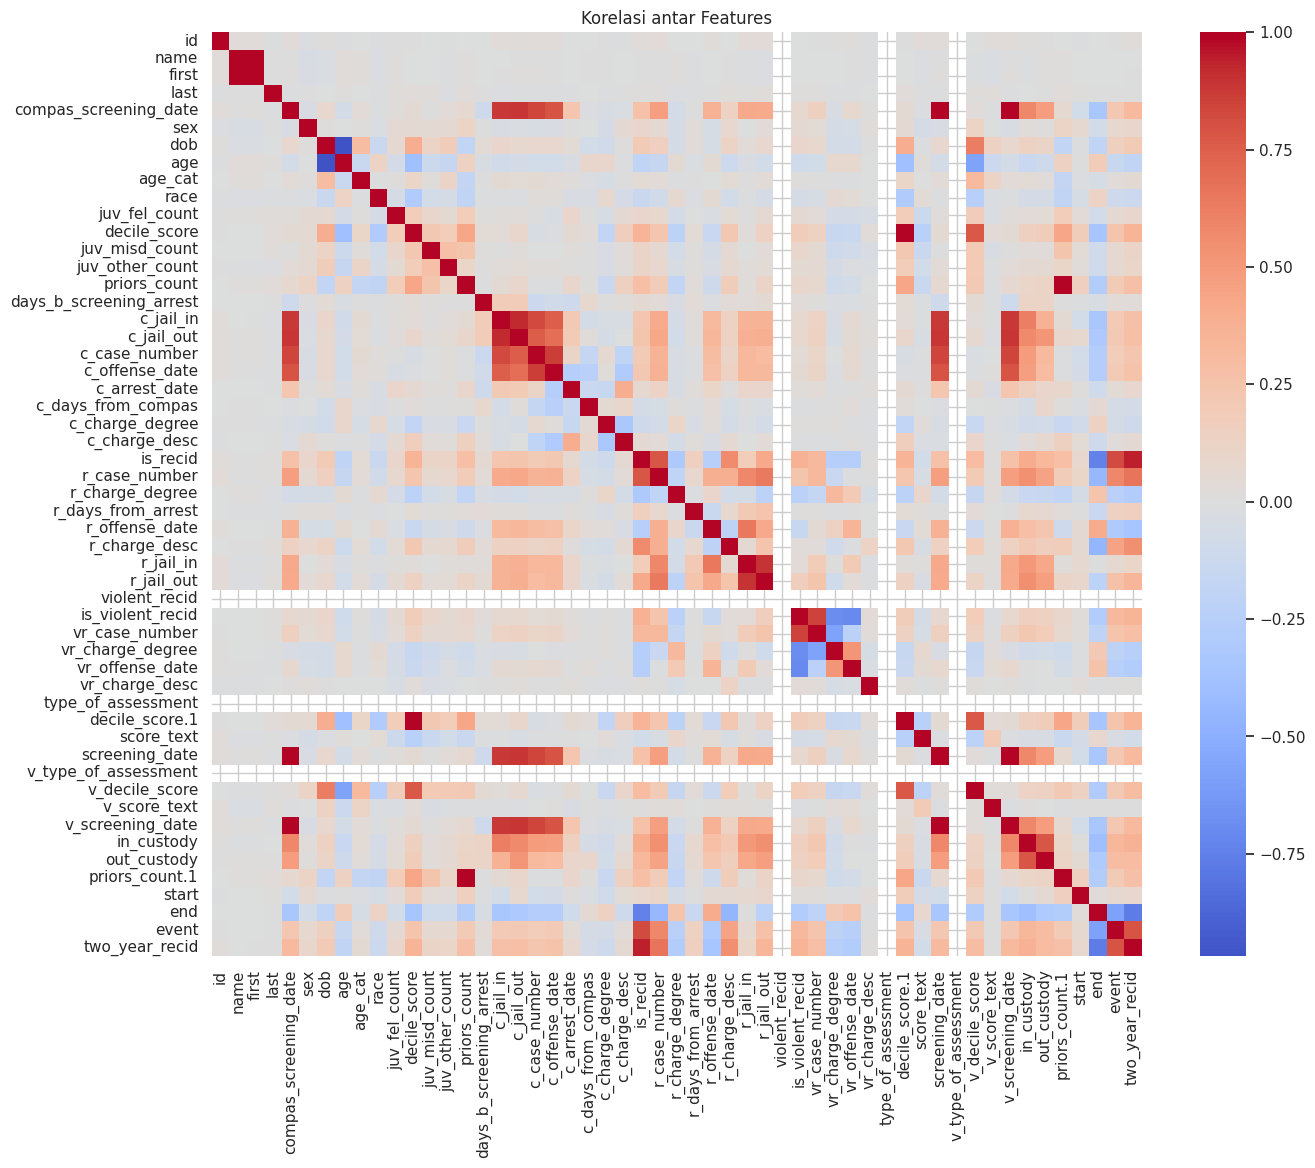

In [ ]:
# Menghitung korelasi
correlation_matrix = compas_df.corr()

# Visualisasi heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Korelasi antar Features')
plt.show()

## 5. Model Training dan Evaluasi

### 5.1. Persiapan Data

In [ ]:
# Drop columns yang tidak relevan atau mengandung informasi target
columns_to_drop = [
    'id', 'name', 'first', 'last', 'compas_screening_date', 'dob',
    'c_jail_in', 'c_jail_out', 'c_offense_date', 'c_arrest_date',
    'r_offense_date', 'r_jail_in', 'r_jail_out', 'vr_offense_date',
    'vr_case_number', 'vr_charge_degree', 'vr_charge_desc', 'vr_officer',
    'vr_arrest_date', 'vr_jail_in', 'vr_jail_out', 'in_custody', 'out_custody',
    'start', 'end', 'event', 'two_year_recid'
]

# Pilih fitur yang relevan
relevant_features = [
    'age', 'sex', 'race', 'priors_count', 'juv_fel_count',
    'juv_misd_count', 'juv_other_count', 'c_charge_degree',
    'c_charge_desc', 'r_charge_degree', 'r_charge_desc',
    'vr_charge_degree', 'vr_charge_desc'
]

# Memisahkan features dan target
X = compas_df[relevant_features].copy()
y = compas_df['is_recid']

# Split data dengan stratifikasi untuk menjaga distribusi kelas
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Menjaga distribusi kelas yang sama
)

# Standardisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5.2. Model Training

In [ ]:
#Inisialisasi model dengan parameter yang lebih spesifik
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=100,      # Jumlah pohon dalam forest
    max_depth=10,          # Kedalaman maksimum pohon
    min_samples_split=5,   # Minimum sampel yang diperlukan untuk split
    min_samples_leaf=2,    # Minimum sampel di leaf node
    class_weight='balanced',  # Menangani class imbalance
    random_state=42
)

# Training model
model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

### 5.3. Evaluasi Model

Confusion Matrix:
[[749   0]
 [  5 689]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       749
           1       1.00      0.99      1.00       694

    accuracy                           1.00      1443
   macro avg       1.00      1.00      1.00      1443
weighted avg       1.00      1.00      1.00      1443


Akurasi: 0.9965
Presisi: 1.0000
Recall: 0.9928
F1-Score: 0.9964
AUC: 0.9980


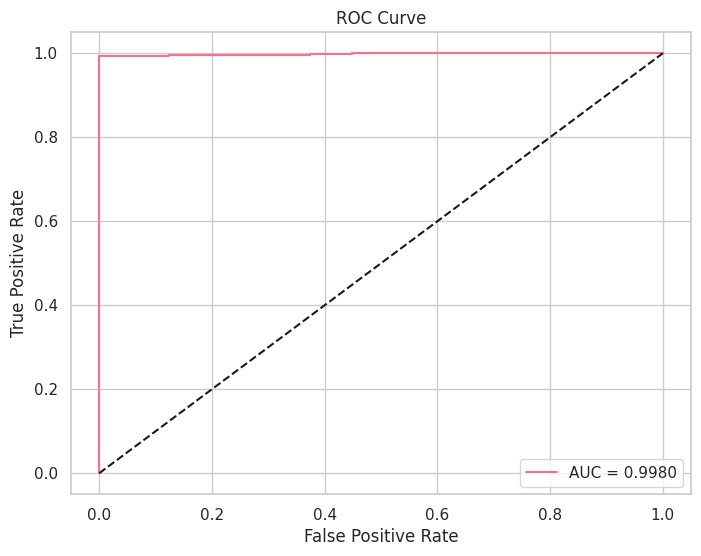

In [ ]:
# Prediksi
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Menghitung metrik evaluasi
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f'\nAkurasi: {accuracy:.4f}')
print(f'Presisi: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC: {auc:.4f}')

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 5.4. Feature Importance

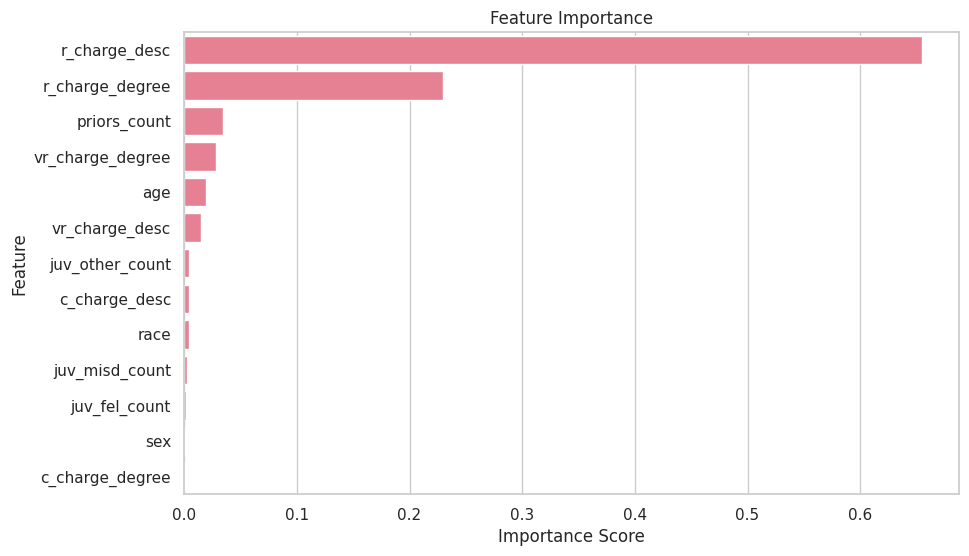

In [ ]:
# Menampilkan feature importance
feature_importance = pd.DataFrame({
    'feature': relevant_features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

### 6.1. Akurasi (Accuracy)
Akurasi dihitung dengan rumus:
\[ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} \]
dimana:
- TP = True Positive (prediksi recidivism benar)
- TN = True Negative (prediksi non-recidivism benar)
- FP = False Positive (prediksi recidivism salah)
- FN = False Negative (prediksi non-recidivism salah)

### 6.2. Presisi (Precision)
Presisi dihitung dengan rumus:
\[ Precision = \frac{TP}{TP + FP} \]
Mengukur seberapa akurat prediksi recidivism.

### 6.3. Recall (Sensitivity)
Recall dihitung dengan rumus:
\[ Recall = \frac{TP}{TP + FN} \]
Mengukur seberapa baik model mendeteksi kasus recidivism.

### 6.4. F1-Score
F1-Score adalah harmonic mean dari precision dan recall:
\[ F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall} \]

### 6.5. AUC-ROC
AUC (Area Under Curve) ROC (Receiver Operating Characteristic) adalah area di bawah kurva yang menggambarkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR):
\[ TPR = \frac{TP}{TP + FN} \]
\[ FPR = \frac{FP}{FP + TN} \]

## 7. Kesimpulan dan Rekomendasi

Berdasarkan analisis yang telah dilakukan:
1. Feature engineering telah dilakukan dengan menangani missing values dan encoding categorical variables
2. EDA menunjukkan distribusi data dan korelasi antar features
3. Model telah di-train dan dievaluasi menggunakan berbagai metrik klasifikasi